# Chapter 1
## Tensor decomposition

This section deals with a simple concept: to decompose a 2D matrix, so far, we have _vectorised_ it, i.e. we made a long thing vector of a rectangular matrix. What if we did not need to? Because we actually didn't. 

Tensor decomposition extends matrix decomposition to N-dimensional arrays, i.e. tensors. The principle is simple: if SVD decomposes a matrix $X$ into:

$$
X = \sum_{j=1}^{m} \sigma_j * U_j \circ V_j
$$

i.e. a sum of rank-1 matrices where $U_j$ and $V_j$ are a column and row vector respsectively, then we can certainly extend this to the 3 dimensional case, just by adding a outer product to a new vector (that captures the third dimension mode, e.g. time, if x and y are space)

$$
X = \sum_{j=1}^{m} \sigma_j * U_j \circ V_j \circ Z_j
$$

this is, again, the sum of rank 1 3D arrays (tensors). 

Let's see an example. Let's initialise the veriables `x`, `y` and `t` to represent a discretisation of the three domains our signals will be defined over.

In [7]:
x=-5:0.1:5;
y=-6:0.1:6;
t=0:0.1:(10*π);

Then let's create the matrix A (there's almost certainly a better way to generate `A`, i.e. one that does not use `repeat`, but this will do for now.)

In [4]:
X=repeat(x', length(y),1,length(t));
Y=repeat(y, 1, length(x),length(t));
T=repeat(reshape(t, 1,1,length(t)),length(y),length(x))

A=exp.(-(X.^2+0.5.*Y.^2)).*(cos.(2*T)).+ (sech.(X).*tanh.(X).*exp.(-0.2.*Y.^2)).*sin.(T);

Let's now compute the tensor decomposition.

In [9]:
size(x)[1]

101

In [12]:
using TensorDecompositions

F = candecomp(A, 2, (randn(size(y)[1], 2), randn(size(x)[1], 2), randn(size(t)[1], 2)))

┌ Info: initializing factor matrices...
└ @ TensorDecompositions /Users/v1fmenol/.julia/packages/TensorDecompositions/3BVk2/src/candecomp.jl:68
┌ Info: applying candecomp ALS method...
└ @ TensorDecompositions /Users/v1fmenol/.julia/packages/TensorDecompositions/3BVk2/src/candecomp.jl:71
ALS iterations 100%|████████████████████████████████████| Time: 0:00:07
┌ Warning: Maximum number 100 of iterations exceeded.
└ @ TensorDecompositions /Users/v1fmenol/.julia/packages/TensorDecompositions/3BVk2/src/utils.jl:234


CANDECOMP{Float64, 3}(([1.88397850810951e-5 6.189973753293202e-10; 2.3902208523373372e-5 1.1160509804573425e-9; … ; 2.3902208523373372e-5 1.1160509804573425e-9; 1.88397850810951e-5 6.189973753293202e-10], [-0.0006830139696426444 3.6797483922293585e-7; -0.0007548244141904712 4.066615852562107e-7; … ; 0.0007548244141915743 -4.066658025211506e-7; 0.0006830139696430544 -3.679764062603116e-7], [-1.8296070521135602e-6 -0.004978642270035053; 0.0004973711312057091 -0.004879227914194468; … ; -0.0005801126637820227 -0.004845625490597393; -8.14575428448703e-5 -0.004976144367251215]), [156352.527344602, 89241.67697290053], Dict{Symbol, Any}())

Let's then plot the 3 eigenmodes for each dimension.

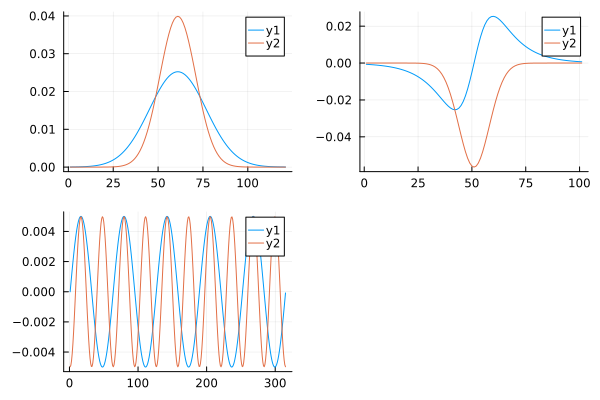

In [13]:
using Plots
gr()

plot(
    plot(F.factors[1]),
    plot(F.factors[2]),
    plot(F.factors[3])
)

Which is exactly what we expected.